# Analysis notebook for mapping evaluation

Assumes results generated - see Makefile for details

In [1]:
task = "fbbt-zfa"
#task = "fbbt-wbbt"
#task = "hsapdv-mmusdv"

In [2]:
# Parameters
task = "hsapdv-mmusdv"


In [3]:
import pandas as pd

In [4]:
%run md_utils.py

## Utility SSSOM loading methods

In [5]:
def task_method_sssom_path(method: str):
    if method == "curated":
        dir = "data"
    else:
        dir = "results"
    return f"../{dir}/{method}-{task}.sssom.tsv"

In [6]:
def load_sssom(method):
    path = task_method_sssom_path(method)
    df = pd.read_csv(path, sep="\t", comment="#")
    df["mapping_source"]  = method
    if method == "lexmatch":
        df[["predicate_id"]] = "skos:exactMatch"
    return df.drop_duplicates()

lexmatch = load_sssom("lexmatch")
lexmatch

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,HsapDv:0000000,human life cycle stage,skos:exactMatch,MmusDv:0000000,mouse life cycle stage,semapv:LexicalMatching,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000105,lexmatch
1,HsapDv:0000000,human life cycle stage,skos:exactMatch,MmusDv:0000000,mouse life cycle stage,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,developmental stage,lexmatch
2,HsapDv:0000000,human life cycle stage,skos:exactMatch,MmusDv:0000000,mouse life cycle stage,semapv:LexicalMatching,oaklib,0.5,oio:hasNarrowSynonym,oio:hasNarrowSynonym,stage,lexmatch
3,HsapDv:0000001,human life cycle,skos:exactMatch,MmusDv:0000001,mouse life cycle,semapv:LexicalMatching,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000104,lexmatch
4,HsapDv:0000003,Carnegie stage 01,skos:exactMatch,MmusDv:0000003,Theiler stage 01,semapv:LexicalMatching,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000106,lexmatch
5,HsapDv:0000004,cleavage stage,skos:exactMatch,MmusDv:0000004,cleavage stage,semapv:LexicalMatching,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000107,lexmatch
6,HsapDv:0000004,cleavage stage,skos:exactMatch,MmusDv:0000004,cleavage stage,semapv:LexicalMatching,oaklib,0.5,rdfs:label,rdfs:label,cleavage stage,lexmatch
7,HsapDv:0000006,blastula stage,skos:exactMatch,MmusDv:0000007,blastula stage,semapv:LexicalMatching,oaklib,0.5,rdfs:label,rdfs:label,blastula stage,lexmatch
8,HsapDv:0000010,gastrula stage,skos:exactMatch,MmusDv:0000013,gastrula stage,semapv:LexicalMatching,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000109,lexmatch
9,HsapDv:0000010,gastrula stage,skos:exactMatch,MmusDv:0000013,gastrula stage,semapv:LexicalMatching,oaklib,0.5,rdfs:label,rdfs:label,gastrula stage,lexmatch


In [7]:
lexmatch.groupby(["subject_match_field", "object_match_field"]).count()

subject_id  subject_label   
subject_match_field  object_match_field                                 
oio:hasDbXref        oio:hasDbXref                  12             12  \
oio:hasExactSynonym  oio:hasExactSynonym             1              1   
oio:hasNarrowSynonym oio:hasNarrowSynonym            1              1   
rdfs:label           oio:hasRelatedSynonym           2              2   
                     rdfs:label                      7              7   

                                            predicate_id  object_id   
subject_match_field  object_match_field                               
oio:hasDbXref        oio:hasDbXref                    12         12  \
oio:hasExactSynonym  oio:hasExactSynonym               1          1   
oio:hasNarrowSynonym oio:hasNarrowSynonym              1          1   
rdfs:label           oio:hasRelatedSynonym             2          2   
                     rdfs:label                        7          7   

                                            object_label   
subject_match_field  object_match_field                    
oio:hasDbXref        oio:hasDbXref                    12  \
oio:hasExactSynonym  oio:hasExactSynonym               1   
oio:hasNarrowSynonym oio:hasNarrowSynonym              1   
rdfs:label           oio:hasRelatedSynonym             2   
                     rdfs:label                        7   

                                            mapping_justification   
subject_match_field  object_match_field                             
oio:hasDbXref        oio:hasDbXref                             12  \
oio:hasExactSynonym  oio:hasExactSynonym                        1   
oio:hasNarrowSynonym oio:hasNarrowSynonym                       1   
rdfs:label           oio:hasRelatedSynonym                      2   
                     rdfs:label                                 7   

                                            mapping_tool  confidence   
subject_match_field  object_match_field                                
oio:hasDbXref        oio:hasDbXref                    12          12  \
oio:hasExactSynonym  oio:hasExactSynonym               1           1   
oio:hasNarrowSynonym oio:hasNarrowSynonym              1           1   
rdfs:label           oio:hasRelatedSynonym             2           2   
                     rdfs:label                        7           7   

                                            match_string  mapping_source  
subject_match_field  object_match_field                                   
oio:hasDbXref        oio:hasDbXref                    12              12  
oio:hasExactSynonym  oio:hasExactSynonym               1               1  
oio:hasNarrowSynonym oio:hasNarrowSynonym              1               1  
rdfs:label           oio:hasRelatedSynonym             2               2  
                     rdfs:label                        7               7

In [8]:
curated = load_sssom("curated")
curated

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,HsapDv:0000000,human life cycle stage,skos:exactMatch,MmusDv:0000000,mouse life cycle stage,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref,uberon:0000105,curated
1,HsapDv:0000000,human life cycle stage,skos:exactMatch,MmusDv:0000000,mouse life cycle stage,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000105,curated
7,HsapDv:0000000,human life cycle stage,skos:exactMatch,MmusDv:0000000,mouse life cycle stage,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref,uberon:0000105,curated
13,HsapDv:0000000,human life cycle stage,skos:exactMatch,MmusDv:0000000,mouse life cycle stage,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000105,curated
49,HsapDv:0000001,human life cycle,skos:exactMatch,MmusDv:0000001,mouse life cycle,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref,uberon:0000104,curated
50,HsapDv:0000001,human life cycle,skos:exactMatch,MmusDv:0000001,mouse life cycle,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000104,curated
54,HsapDv:0000001,human life cycle,skos:exactMatch,MmusDv:0000001,mouse life cycle,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref,uberon:0000104,curated
58,HsapDv:0000001,human life cycle,skos:exactMatch,MmusDv:0000001,mouse life cycle,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000104,curated
74,HsapDv:0000002,embryonic human stage,skos:exactMatch,MmusDv:0000002,embryonic mouse stage,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000068,curated
90,HsapDv:0000002,embryonic human stage,skos:exactMatch,MmusDv:0000042,prenatal stage,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref,uberon:0000068,curated


In [9]:
gpt3 = load_sssom("gpt3")
gpt3

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,HsapDv:0000000,human life cycle stage,skos:exactMatch,MmusDv:0000000,mouse life cycle stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000105,gpt3
1,HsapDv:0000000,human life cycle stage,skos:exactMatch,MmusDv:0000000,mouse life cycle stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,developmental stage,gpt3
2,HsapDv:0000000,human life cycle stage,skos:exactMatch,MmusDv:0000000,mouse life cycle stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasNarrowSynonym,oio:hasNarrowSynonym,stage,gpt3
3,HsapDv:0000001,human life cycle,skos:exactMatch,MmusDv:0000001,mouse life cycle,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000104,gpt3
4,HsapDv:0000003,Carnegie stage 01,skos:broadMatch,MmusDv:0000003,Theiler stage 01,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000106,gpt3
5,HsapDv:0000004,cleavage stage,skos:exactMatch,MmusDv:0000004,cleavage stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000107,gpt3
6,HsapDv:0000004,cleavage stage,skos:exactMatch,MmusDv:0000004,cleavage stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,rdfs:label,rdfs:label,cleavage stage,gpt3
7,HsapDv:0000006,blastula stage,skos:exactMatch,MmusDv:0000007,blastula stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,rdfs:label,rdfs:label,blastula stage,gpt3
8,HsapDv:0000010,gastrula stage,skos:relatedMatch,MmusDv:0000013,gastrula stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000109,gpt3
9,HsapDv:0000010,gastrula stage,skos:relatedMatch,MmusDv:0000013,gastrula stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,rdfs:label,rdfs:label,gastrula stage,gpt3


In [10]:
gpt4 = load_sssom("gpt4")
gpt4

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,HsapDv:0000000,human life cycle stage,skos:relatedMatch,MmusDv:0000000,mouse life cycle stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000105,gpt4
1,HsapDv:0000000,human life cycle stage,skos:relatedMatch,MmusDv:0000000,mouse life cycle stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,developmental stage,gpt4
2,HsapDv:0000000,human life cycle stage,skos:relatedMatch,MmusDv:0000000,mouse life cycle stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasNarrowSynonym,oio:hasNarrowSynonym,stage,gpt4
3,HsapDv:0000001,human life cycle,skos:relatedMatch,MmusDv:0000001,mouse life cycle,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000104,gpt4
4,HsapDv:0000003,Carnegie stage 01,skos:relatedMatch,MmusDv:0000003,Theiler stage 01,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000106,gpt4
5,HsapDv:0000004,cleavage stage,skos:exactMatch,MmusDv:0000004,cleavage stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000107,gpt4
6,HsapDv:0000004,cleavage stage,skos:exactMatch,MmusDv:0000004,cleavage stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,rdfs:label,rdfs:label,cleavage stage,gpt4
7,HsapDv:0000006,blastula stage,skos:exactMatch,MmusDv:0000007,blastula stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,rdfs:label,rdfs:label,blastula stage,gpt4
8,HsapDv:0000010,gastrula stage,skos:exactMatch,MmusDv:0000013,gastrula stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000109,gpt4
9,HsapDv:0000010,gastrula stage,skos:exactMatch,MmusDv:0000013,gastrula stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,rdfs:label,rdfs:label,gastrula stage,gpt4


In [11]:
pd.concat([gpt3, gpt4]).groupby(["mapping_source", "predicate_id"]).count()

subject_id  subject_label  object_id   
mapping_source predicate_id                                              
gpt3           owl:differentFrom           1              1          1  \
               skos:broadMatch             3              3          3   
               skos:exactMatch            11             11         11   
               skos:narrowMatch            3              3          3   
               skos:relatedMatch           5              5          5   
gpt4           skos:exactMatch             7              7          7   
               skos:relatedMatch          16             16         16   

                                  object_label  mapping_justification   
mapping_source predicate_id                                             
gpt3           owl:differentFrom             1                      1  \
               skos:broadMatch               3                      3   
               skos:exactMatch              11                     11   
               skos:narrowMatch              3                      3   
               skos:relatedMatch             5                      5   
gpt4           skos:exactMatch               7                      7   
               skos:relatedMatch            16                     16   

                                  subject_source  object_source  mapping_tool   
mapping_source predicate_id                                                     
gpt3           owl:differentFrom               1              1             1  \
               skos:broadMatch                 3              3             3   
               skos:exactMatch                11             11            11   
               skos:narrowMatch                3              3             3   
               skos:relatedMatch               5              5             5   
gpt4           skos:exactMatch                 7              7             7   
               skos:relatedMatch              16             16            16   

                                  confidence  subject_match_field   
mapping_source predicate_id                                         
gpt3           owl:differentFrom           1                    1  \
               skos:broadMatch             3                    3   
               skos:exactMatch            11                   11   
               skos:narrowMatch            3                    3   
               skos:relatedMatch           5                    5   
gpt4           skos:exactMatch             7                    7   
               skos:relatedMatch          16                   16   

                                  object_match_field  match_string  
mapping_source predicate_id                                         
gpt3           owl:differentFrom                   1             1  
               skos:broadMatch                     3             3  
               skos:exactMatch                    11            11  
               skos:narrowMatch                    3             3  
               skos:relatedMatch                   5             5  
gpt4           skos:exactMatch                     7             7  
               skos:relatedMatch                  16            16

In [12]:
logmap = load_sssom("logmap")
logmap

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,HsapDv:0000091,MmusDv:0000076,0.83,skos:exactMatch,human late adulthood stage,aged adult stage,logmap
1,HsapDv:0000091,MmusDv:0000097,0.98,skos:exactMatch,human late adulthood stage,late adult stage,logmap
2,HsapDv:0000012,MmusDv:0000017,1.00,skos:exactMatch,neurula stage,Theiler stage 11,logmap
3,HsapDv:0000037,MmusDv:0000031,1.00,skos:exactMatch,fetal stage,fetal stage,logmap
4,HsapDv:0000015,MmusDv:0000018,1.00,skos:exactMatch,organogenesis stage,organogenesis stage,logmap
5,HsapDv:0000092,MmusDv:0000075,1.03,skos:exactMatch,human middle aged stage,middle aged stage,logmap
6,HsapDv:0000010,MmusDv:0000013,1.00,skos:exactMatch,gastrula stage,gastrula stage,logmap
7,HsapDv:0000045,MmusDv:0000042,1.00,skos:exactMatch,prenatal stage,prenatal stage,logmap
8,HsapDv:0000000,MmusDv:0000000,1.01,skos:exactMatch,human life cycle stage,mouse life cycle stage,logmap
9,HsapDv:0000004,MmusDv:0000004,1.00,skos:exactMatch,cleavage stage,cleavage stage,logmap


In [13]:
def filter_logmap(df, thresh: float):
    return df.query(f"confidence > {thresh}")
filter_logmap(logmap, 0.8)

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,HsapDv:0000091,MmusDv:0000076,0.83,skos:exactMatch,human late adulthood stage,aged adult stage,logmap
1,HsapDv:0000091,MmusDv:0000097,0.98,skos:exactMatch,human late adulthood stage,late adult stage,logmap
2,HsapDv:0000012,MmusDv:0000017,1.00,skos:exactMatch,neurula stage,Theiler stage 11,logmap
3,HsapDv:0000037,MmusDv:0000031,1.00,skos:exactMatch,fetal stage,fetal stage,logmap
4,HsapDv:0000015,MmusDv:0000018,1.00,skos:exactMatch,organogenesis stage,organogenesis stage,logmap
5,HsapDv:0000092,MmusDv:0000075,1.03,skos:exactMatch,human middle aged stage,middle aged stage,logmap
6,HsapDv:0000010,MmusDv:0000013,1.00,skos:exactMatch,gastrula stage,gastrula stage,logmap
7,HsapDv:0000045,MmusDv:0000042,1.00,skos:exactMatch,prenatal stage,prenatal stage,logmap
8,HsapDv:0000000,MmusDv:0000000,1.01,skos:exactMatch,human life cycle stage,mouse life cycle stage,logmap
9,HsapDv:0000004,MmusDv:0000004,1.00,skos:exactMatch,cleavage stage,cleavage stage,logmap


In [14]:
def evaluate(results, gold):
    # filtered = results.query("predicate_id != 'owl:differentFrom'")
    filtered = results.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "object_id"]
    results_set = set([tuple(x) for x in filtered[cols].values])
    gold_set = set([tuple(x) for x in gold[cols].values])

    # Calculate TP, FP, FN
    TP = len(results_set.intersection(gold_set))
    FP = len(results_set.difference(gold_set))
    FN = len(gold_set.difference(results_set))

    # Calculate precision and recall
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    # Calculate F1 score
    F1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return F1, precision, recall

evaluate(gpt3, curated)

(0.5217391304347826, 1.0, 0.35294117647058826)

In [15]:
pairs = [(conf, evaluate(filter_logmap(logmap, conf), curated)[0]) for conf in sorted(set(pd.unique(logmap['confidence'])))]
pairs = sorted(pairs, key=lambda x: -x[1])
pairs[0:5]

[(0.98, 0.6428571428571428),
 (0.83, 0.5999999999999999),
 (1.0, 0.2),
 (1.03, 0.1111111111111111),
 (1.01, 0.10526315789473684)]

In [16]:
logmap_best = filter_logmap(logmap, pairs[0][0])
logmap_best

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
2,HsapDv:0000012,MmusDv:0000017,1.00,skos:exactMatch,neurula stage,Theiler stage 11,logmap
3,HsapDv:0000037,MmusDv:0000031,1.00,skos:exactMatch,fetal stage,fetal stage,logmap
4,HsapDv:0000015,MmusDv:0000018,1.00,skos:exactMatch,organogenesis stage,organogenesis stage,logmap
5,HsapDv:0000092,MmusDv:0000075,1.03,skos:exactMatch,human middle aged stage,middle aged stage,logmap
6,HsapDv:0000010,MmusDv:0000013,1.00,skos:exactMatch,gastrula stage,gastrula stage,logmap
7,HsapDv:0000045,MmusDv:0000042,1.00,skos:exactMatch,prenatal stage,prenatal stage,logmap
8,HsapDv:0000000,MmusDv:0000000,1.01,skos:exactMatch,human life cycle stage,mouse life cycle stage,logmap
9,HsapDv:0000004,MmusDv:0000004,1.00,skos:exactMatch,cleavage stage,cleavage stage,logmap
10,HsapDv:0000083,MmusDv:0000112,1.00,skos:exactMatch,infant stage,premature stage,logmap
12,HsapDv:0000204,MmusDv:0000110,1.10,skos:exactMatch,mature stage,mature stage,logmap


In [17]:
def mk_results(dfs):
    combined = pd.concat(dfs)
    objs = []
    for df in dfs:
        methods = set(pd.unique(df["mapping_source"]))
        assert len(methods) == 1
        method = list(methods)[0]
        f1, p, r = evaluate(df, curated)
        objs.append({"method": method, "f1": f1, "P": p, "R": r})
    return pd.DataFrame(objs)
    
  

summary = mk_results([lexmatch, logmap_best, gpt3, gpt4])
#summary.to_markdown(f"main-results-{task}.md")
as_md_table(summary, f"table-main-results-{task}.md")
summary.style.highlight_max(props='font-weight:bold').format(precision=3)

,method,f1,P,R
0,lexmatch,0.839,0.929,0.765
1,logmap,0.643,0.818,0.529
2,gpt3,0.522,1.000,0.353
3,gpt4,0.381,1.000,0.235


In [18]:
import matplotlib.pyplot as plt

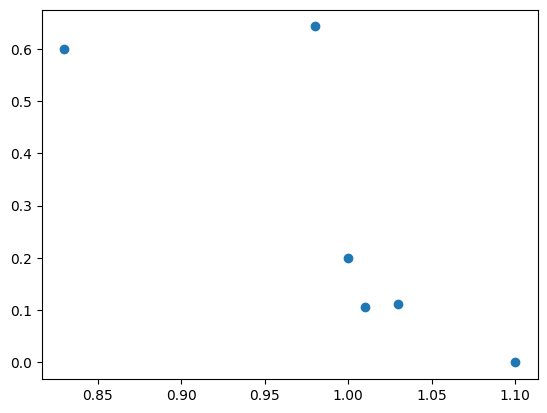

In [19]:
x, y = zip(*pairs)

# Create a scatter plot
plt.scatter(x, y)

# Show the plot
plt.show()

In [20]:
import seaborn as sns

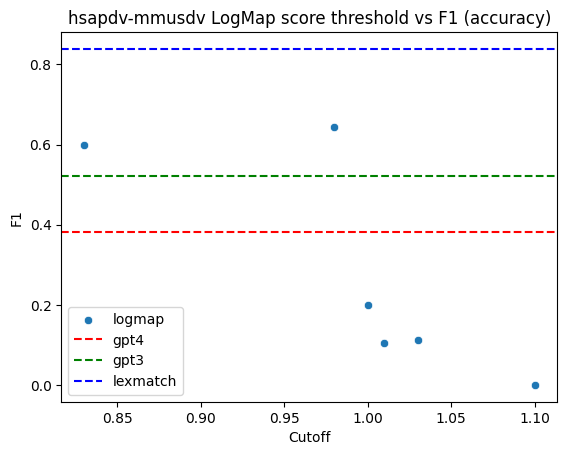

In [21]:
df = pd.DataFrame(pairs, columns=['Cutoff', 'F1'])

# Create a scatter plot
sns.scatterplot(data=df, x='Cutoff', y='F1', label="logmap")

lines = [(gpt4, "gpt4", "red"), (gpt3, "gpt3", "green"), (lexmatch, "lexmatch", "blue")]

for r, label, color in lines:
    plt.axhline(evaluate(r, curated)[0], color=color, linestyle='--', label=label)

plt.legend()

# Adding labels
plt.xlabel('Cutoff')
plt.ylabel('F1')
plt.title(f'{task} LogMap score threshold vs F1 (accuracy)')

plt.savefig(f"../content/images/logmap-scatter-plot-{task}.pdf", format='pdf')

# Show the plot
plt.show()

In [22]:
import plotly

In [23]:
import plotly.io as pio
pio.renderers.default='notebook'

In [24]:
plt.savefig(f"logmap-scatter-plot-{task}.pdf", format='pdf')

<Figure size 640x480 with 0 Axes>

In [25]:
plt.savefig(f"logmap-scatter-plot-{task}.png", format='png')

<Figure size 640x480 with 0 Axes>

In [26]:
def diffs(x, y):
    x2 = x.query("predicate_id == 'skos:exactMatch'")
    y2 = y.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "subject_label", "object_id", "object_label"]
    xset = set([tuple(v) for v in x2[cols].values])
    yset = set([tuple(v) for v in y2[cols].values])
    return xset-yset

diffs(logmap_best, gpt4)

{('HsapDv:0000000',
  'human life cycle stage',
  'MmusDv:0000000',
  'mouse life cycle stage'),
 ('HsapDv:0000012', 'neurula stage', 'MmusDv:0000017', 'Theiler stage 11'),
 ('HsapDv:0000037', 'fetal stage', 'MmusDv:0000031', 'fetal stage'),
 ('HsapDv:0000045', 'prenatal stage', 'MmusDv:0000042', 'prenatal stage'),
 ('HsapDv:0000083', 'infant stage', 'MmusDv:0000112', 'premature stage'),
 ('HsapDv:0000092',
  'human middle aged stage',
  'MmusDv:0000075',
  'middle aged stage'),
 ('HsapDv:0000204', 'mature stage', 'MmusDv:0000110', 'mature stage')}